##Importing the required library

In [3]:
import tensorflow

In [4]:
import numpy#for numerical analysis
import tensorflow#open source ml tool by google
from tensorflow.keras.datasets import mnist #mnist dataset
from tensorflow.keras.models import Sequential# stack for layers
from tensorflow.keras import layers#input,middle and output layers forcnn structure
from tensorflow.keras.layers import Dense,Flatten#dense and flatten layers
from tensorflow.keras.layers import Conv2D#convolutional layers
from tensorflow import keras#library for building neural networks built on tensorflow
from tensorflow.keras.optimizers import Adam#optimizers
from keras.utils import np_utils

##Loading the data

In [5]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [6]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [7]:
print(x_test.shape)
print(y_test.shape)

(10000, 28, 28)
(10000,)


##Analyzing the data

In [8]:
x_train[5]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  13,  25, 100, 122,   7,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [9]:
y_train[5]

2

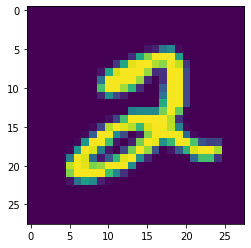

In [10]:
import matplotlib.pyplot as plt
plt.imshow(x_train[5])


##Reshaping the data

In [11]:
x_train=x_train.reshape(60000,28,28,1).astype('float32')
x_test=x_test.reshape(10000,28,28,1).astype('float32')

In [12]:
print ("Shape of X_train: {}".format(x_train.shape))
print ("Shape of y_train: {}".format(y_train.shape))
print ("Shape of X_test: {}".format(x_test.shape))
print ("Shape of y_test: {}".format(y_test.shape))

Shape of X_train: (60000, 28, 28, 1)
Shape of y_train: (60000,)
Shape of X_test: (10000, 28, 28, 1)
Shape of y_test: (10000,)


Applying one Hotencoding

convert numerical values to classes where 0 to 9 are 10 seperate classes if value is 5 class 5 is 1 else 0

In [13]:
no_of_classes=10
y_train=np_utils.to_categorical(y_train,no_of_classes)
y_test=np_utils.to_categorical(y_test,no_of_classes)

In [14]:
y_test[3]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [16]:
from keras.layers import Dense, Flatten, MaxPooling2D, Dropout

##Adding CNN layer

In [17]:
model = Sequential()
model.add(Conv2D(64,(3,3),input_shape=(28,28,1),activation='relu'))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(Flatten())
model.add(Dense(no_of_classes,activation='softmax'))

##Compile the model

In [18]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

##Train the model

In [19]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=5,batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 193s 103ms/step - loss: 0.2205 - accuracy: 0.9506 - val_loss: 0.0833 - val_accuracy: 0.9739
Epoch 2/5
1875/1875 [==============================] - 191s 102ms/step - loss: 0.0664 - accuracy: 0.9797 - val_loss: 0.0812 - val_accuracy: 0.9766
Epoch 3/5
1875/1875 [==============================] - 191s 102ms/step - loss: 0.0448 - accuracy: 0.9860 - val_loss: 0.0790 - val_accuracy: 0.9771
Epoch 4/5
1875/1875 [==============================] - 192s 103ms/step - loss: 0.0360 - accuracy: 0.9888 - val_loss: 0.0970 - val_accuracy: 0.9783
Epoch 5/5
1875/1875 [==============================] - 190s 101ms/step - loss: 0.0253 - accuracy: 0.9921 - val_loss: 0.1135 - val_accuracy: 0.9780


##Observing the metrices

In [20]:
metrics=model.evaluate(x_test,y_test,verbose=0)
print("metrics-score=>test loss & accuracy")
print(metrics)

metrics-score=>test loss & accuracy
[0.11346529424190521, 0.9779999852180481]


##Test the model

In [21]:
prediction=model.predict(x_test[:5])
print(prediction)

[[1.18082266e-09 6.46880158e-19 2.05706243e-08 7.77698739e-10
  6.73728220e-17 1.58013149e-15 3.77542163e-19 1.00000000e+00
  5.06455284e-13 2.32336442e-10]
 [6.07585553e-12 2.60282349e-14 1.00000000e+00 5.12051216e-16
  5.35979846e-19 4.29714932e-20 6.22856600e-10 6.82687927e-23
  2.63116924e-11 3.68596495e-20]
 [3.21985461e-08 9.99960065e-01 3.88382177e-05 1.90822275e-10
  1.04542255e-06 3.17991535e-08 4.69601823e-11 8.46950808e-12
  4.35507523e-08 1.76938360e-11]
 [1.00000000e+00 1.19920992e-16 3.54643953e-10 9.57786889e-18
  5.82467087e-18 2.27030744e-16 1.09466099e-11 1.18808219e-15
  9.53036695e-13 1.24150221e-11]
 [5.14329074e-12 1.66137339e-15 4.32270799e-12 9.86808842e-16
  1.00000000e+00 3.48149282e-19 2.62237483e-16 3.17585871e-16
  6.91275786e-15 1.43418645e-11]]


In [22]:
import numpy as np

In [23]:
print(np.argmax(prediction,axis=1))

[7 2 1 0 4]


In [24]:
print(y_test[:5])

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


##Save the model

In [25]:
model.save('models/mnistcnn.h5')

In [26]:
!pip install watson-machine-learning-client 

     |████████████████████████████████| 538 kB 8.5 MB/s eta 0:00:01


In [27]:
from ibm_watson_machine_learning import APIClient
wml_credentials={
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"K13VMgAWNtBzDFwAs9NudhVVgJ-hwGQ_ZlqC3-DW8S34"
}

client=APIClient(wml_credentials)

In [28]:
client

In [34]:
def guid_space_name(client,ibmproject):
    space=client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']['name']==ibmproject)['metadata']['id'])

In [35]:
space_uid=guid_space_name(client,'ibmproject')
print("Space UID "+space_uid)

Space UID 40f37abd-3975-40a1-b862-7fe00730cfa2


In [36]:
client.set.default_space(space_uid)

'SUCCESS'

In [37]:
client.software_specifications.list(200)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt

In [38]:
software_space_uid=client.software_specifications.get_uid_by_name('tensorflow_rt22.1-py3.9')

In [39]:
software_space_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [40]:
!tar -zcvf digit-recognition.tgz mnistCNN.h5

tar: mnistCNN.h5: Cannot stat: No such file or directory
tar: Exiting with failure status due to previous errors


In [41]:
ls

digit-recognition.tgz  models/


In [43]:
model_details=client.repository.store_model(model='digit-recognition.tgz',meta_props={
    client.repository.ModelMetaNames.NAME:"CNN Model Building",
    client.repository.ModelMetaNames.TYPE:'tensorflow_2.7',
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_space_uid
})

In [44]:
model_id=client.repository.get_model_id(model_details)

In [45]:
model_id

'269d373c-5d0f-40cf-8ed9-c76a1520110b'